Use a dynamic simulation to vary the sample sizes n ∈ [100, 1000, step = 50] and click-through rates c ∈ [50, 600, step =
10] for Versions A and B. Observe how the p-value and hypothesis test decision change as you modify these parameters."

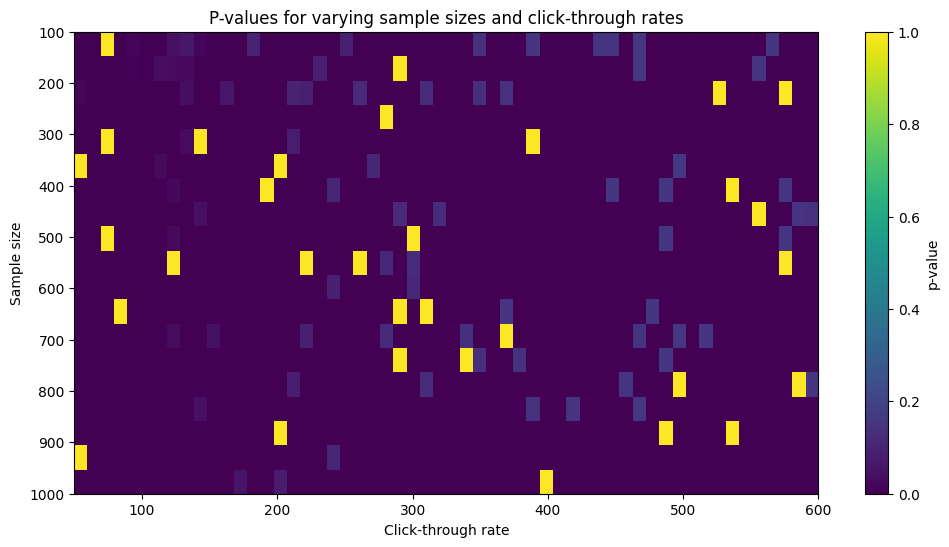

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the range of sample sizes and click-through rates
sample_sizes = np.arange(100, 1050, 50)
click_through_rates = np.arange(50, 610, 10)

# Initialize lists to store results
p_values = []
decisions = []

# Perform the simulation
for n in sample_sizes:
    for c in click_through_rates:
        # Simulate data for Version A and Version B
        clicks_A = np.random.binomial(n, c / 1000)
        clicks_B = np.random.binomial(n, c / 1000)
        
        # Perform a hypothesis test (e.g., two-sample t-test)
        t_stat, p_value = stats.ttest_ind_from_stats(mean1=clicks_A/n, std1=np.sqrt((clicks_A/n)*(1-clicks_A/n)/n),
                                                     nobs1=n, mean2=clicks_B/n, std2=np.sqrt((clicks_B/n)*(1-clicks_B/n)/n),
                                                     nobs2=n)
        
        # Store the p-value and decision
        p_values.append(p_value)
        decisions.append(p_value < 0.05)

# Convert results to numpy arrays for easier manipulation
p_values = np.array(p_values).reshape(len(sample_sizes), len(click_through_rates))
decisions = np.array(decisions).reshape(len(sample_sizes), len(click_through_rates))

# Plot the results
plt.figure(figsize=(12, 6))
plt.imshow(p_values, aspect='auto', cmap='viridis', extent=[50, 600, 1000, 100])
plt.colorbar(label='p-value')
plt.xlabel('Click-through rate')
plt.ylabel('Sample size')
plt.title('P-values for varying sample sizes and click-through rates')
plt.show()